# Tests

In [1]:
import os
import sys
import json
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
from termcolor import colored

with open('../config/default.json') as data_file:
    config = json.load(data_file)
    
sys.path.append(os.path.abspath(config["NOMEROFF_NET"]["ROOT"]))

In [2]:
from NomeroffNet import  filters, RectDetector, TextDetector, RegionDetector, Detector, textPostprocessing

nnet = Detector(config)
nnet.loadModel()

rectDetector = RectDetector(config["RECT_DETECTOR"])
textDetector = TextDetector(config["TEXT_DETECTOR"]["ENGINE"])
regionDetector = RegionDetector()
regionDetector.load(os.path.join(config["NOMEROFF_NET"]["ROOT"], config["NP_STANDART_DETECTOR"]["MODEL_PATH"]))

Using TensorFlow backend.
/usr/local/lib64/python3.6/site-packages/keras/engine/saving.py:304: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [3]:
def test(dirName, fname, y, verbose=0):
    img_path = os.path.join(dirName, fname)
    if verbose==1:
        print(colored(f"__________ \t\t {img_path} \t\t __________", "blue"))
    img = mpimg.imread(img_path)
    NP = nnet.detect([img])
    if verbose==1:
        print(colored("MASK_RCNN RESULTS:", "blue"))
        print(NP)
    cv_img_masks = filters.cv_img_mask(NP) 
    nGood = 0
    nBad = 0
    res = []
    for img_mask in cv_img_masks:
        points = rectDetector.detect(img_mask, fixRectangleAngle=1, outboundWidthOffset=3)
        if verbose==1:
            print(colored("RECT DETECTOR RESULTS:", "blue"))
            print(points)
        zone = rectDetector.get_cv_zones(img, points)
      
        if verbose==1:
            plt.axis("off")
            plt.imshow(zone)
            plt.show()
        regionId = regionDetector.predict(zone)
        regionName = regionDetector.getLabels(regionId)
        if verbose==1:
            print(colored("REGION NAME:", "blue"))
            print(regionName)
        text = textDetector.detect(zone)
        if verbose==1:
            print(colored("SOURCE TEXT:", "blue"))
            print(text)
        text = textPostprocessing(text, regionName)
        if verbose==1:
            print(colored("POSTPROCESSED TEXT:", "blue"))
            print(text)
        res.append(text)
    for yText in y:
        if yText in res:
            print(colored(f"OK: TEXT:{yText} \t RESULTS:{res} \t\t in PATH:{img_path}", 'green'))
            nGood += 1
        else:
            print(colored(f"NOT OK: TEXT:{yText} \t RESULTS:{res} \t\t in PATH:{img_path} ", 'red'))
            nBad += 1
    return nGood, nBad

In [4]:
dirName = "images/"
testData = {
    "0.jpeg": ["AI5255EI"],
    "1.jpeg": ["HH7777CC"],
    "2.jpeg": ["AT1515CK"],
    "3.jpeg": ["BX0578CE"],
    "4.jpeg": ["AC4249CB"],
    "5.jpeg": ["BC3496HC"],
    "6.jpeg": ["BC3496HC"],
    "7.jpeg": ["AO1306CH"],
    "8.jpeg": ["AE1077CO"],
    "9.jpeg": ["AB3391AK"],
    "10.jpeg": ["BE7425CB"],
    "11.jpeg": ["BE7425CB"],
    "12.jpeg": ["AB0608EA"],
    "13.jpeg": ["AB0680EA"],
    "14.jpeg": ["BM1930BM"],
    "15.jpeg": ["AI1382HB"],
    "16.jpeg": ["AB7333BH"],
    "17.jpeg": ["AB7642CT"],
    "18.jpeg": ["AC4921CB"],
    "19.jpeg": ["BC9911BK"],
    "20.jpeg": ["BC7007AK"],
    "21.jpeg": ["AB5649CI"],
    "22.jpeg": ["AX2756EK"],
    "23.jpeg": ["AA7564MX"],
    "24.jpeg": ["AM5696CK"],
    "25.jpeg": ["AM5696CK"],
}

gGood = 0
gBad = 0
i = 0
for fileName in testData.keys():
    print(f"step {i}")
    nGood, nBad = test(dirName, fileName, testData[fileName])
    gGood += nGood
    gBad += nBad
    i += 1
total = gGood + gBad
print(f"TOTAL GOOD: {gGood/total}")
print(f"TOTAL BED: {gBad/total}")

/usr/local/lib64/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


__________ 		 images/12.jpeg 		 __________
MASK_RCNN RESULTS:
[{'rois': array([[345,  55, 401, 121],
       [ 76, 253, 120, 276]], dtype=int32), 'class_ids': array([1, 1], dtype=int32), 'scores': array([0.999734  , 0.92951983], dtype=float32), 'masks': array([[[False, False],
        [False, False],
        [False, False],
        ...,
        [False, False],
        [False, False],
        [False, False]],

       [[False, False],
        [False, False],
        [False, False],
        ...,
        [False, False],
        [False, False],
        [False, False]],

       [[False, False],
        [False, False],
        [False, False],
        ...,
        [False, False],
        [False, False],
        [False, False]],

       ...,

       [[False, False],
        [False, False],
        [False, False],
        ...,
        [False, False],
        [False, False],
        [False, False]],

       [[False, False],
        [False, False],
        [False, False],
        ...,
        [Fals

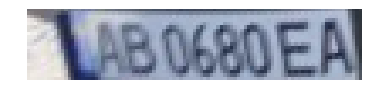

REGION NAME:
eu-ua-2004
SOURCE TEXT:
LB OLB0EA
POSTPROCESSED TEXT:
ABOLB0EA
RECT DETECTOR RESULTS:
[[275.          73.        ]
 [275.         122.        ]
 [253.55172729 122.        ]
 [253.55172729  73.        ]]


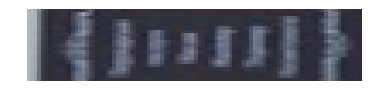

REGION NAME:
xx-unknown
SOURCE TEXT:
EfiiiiiRg
POSTPROCESSED TEXT:

NOT OK: TEXT:AB0608EA 	 RESULTS:['ABOLB0EA', ''] 		 in PATH:images/12.jpeg 
__________ 		 images/11.jpeg 		 __________


/usr/local/lib64/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


MASK_RCNN RESULTS:
[{'rois': array([[ 295, 1134,  371, 1208]], dtype=int32), 'class_ids': array([1], dtype=int32), 'scores': array([0.9983311], dtype=float32), 'masks': array([[[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       ...,

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]]])}]
RECT DETECTOR RESULTS:
[[1202.05112772  292.83522713]
 [1214.45969733  342.4692309 ]
 [1137.81203125  375.31818362

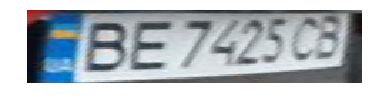

REGION NAME:
eu-ua-2015
SOURCE TEXT:
=BE 7225C5)
POSTPROCESSED TEXT:
ABE7225C5)
NOT OK: TEXT:BE7425CB 	 RESULTS:['ABE7225C5)'] 		 in PATH:images/11.jpeg 


(0, 1)

In [5]:
test(dirName, "12.jpeg", testData["12.jpeg"], verbose=1)
test(dirName, "11.jpeg", testData["11.jpeg"], verbose=1)